<a href="https://colab.research.google.com/github/unique-Sachin/MisogiAI/blob/master/MISOGI_Exploratory_Data_Analysis_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Swiggy restaurant dataset from "https://www.kaggle.com/datasets/abhijitdahatonde/swiggy-restuarant-dataset" by answering a series of easy, medium, and hard questions, including data cleaning, analysis, and visualization as outlined in the provided plan.

## Summary:

### Data Analysis Key Findings

*   Attempts to download the dataset from the provided Kaggle URL using `requests` and `curl` were made. While `curl` successfully downloaded a file, neither method resulted in a valid zip archive that could be extracted.
*   Directly loading the dataset from the Kaggle URL or hypothetical raw GitHub URLs with `pd.read_csv` also failed due to parsing errors and 404 Not Found errors, respectively.
*   Due to the inability to successfully download or access the dataset file in a usable format, the data loading step could not be completed.

### Insights or Next Steps

*   The primary challenge is accessing the dataset. The next step would be to find a verified and accessible source for the Swiggy restaurant dataset (e.g., an alternative download link, a shared file, or a different Kaggle dataset).
*   If a valid source is found, retry the data loading process, ensuring the file format (CSV, JSON, etc.) and potential encoding issues are handled correctly.


# New Section

### Subtask:
Load the Swiggy restaurant dataset from the local path into a pandas DataFrame.

**Reasoning**:
Load the dataset from the local path `/content/swiggy.csv` into a DataFrame and display the first few rows to confirm successful loading.

In [9]:
import pandas as pd

csv_path = "/content/swiggy.csv"
try:
    df = pd.read_csv(csv_path)
    display(df.head())
    print("Successfully loaded data from local path.")
except FileNotFoundError:
    print(f"Error: The file was not found at {csv_path}")
    df = None
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df = None

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


Successfully loaded data from local path.


## Data Cleaning and Preparation

### Subtask:
Inspect data types, handle missing values, and clean columns as necessary.

**Reasoning**:
Inspect the data types of each column to understand how pandas interpreted the data during loading and check for any unexpected types that might require conversion. Additionally, check for missing values in each column to identify where data imputation or removal might be necessary.

In [10]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


None

,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


## Easy Questions Analysis

### Subtask:
Calculate the total number of restaurants, find the maximum price, compute the average rating, determine the total number of ratings, and count the different food types.

**Reasoning**:
Calculate the total number of restaurants by getting the number of rows in the DataFrame.

In [11]:
total_restaurants = len(df)
print(f"Total number of restaurants: {total_restaurants}")

Total number of restaurants: 8680


**Reasoning**:
Find the maximum price by using the `max()` function on the 'Price' column.

In [12]:
max_price = df['Price'].max()
print(f"Maximum price: {max_price}")

Maximum price: 2500.0


**Reasoning**:
Compute the average rating by using the `mean()` function on the 'Avg ratings' column.

In [13]:
average_rating = df['Avg ratings'].mean()
print(f"Average rating: {average_rating:.2f}")

Average rating: 3.66


**Reasoning**:
Determine the total number of ratings by using the `sum()` function on the 'Total ratings' column.

In [14]:
total_ratings = df['Total ratings'].sum()
print(f"Total number of ratings: {total_ratings}")

Total number of ratings: 1359590


**Reasoning**:
Count the different food types by using the `nunique()` function on the 'Food type' column.

In [15]:
food_type_count = df['Food type'].nunique()
print(f"Number of different food types: {food_type_count}")

Number of different food types: 3734


## Medium Questions Analysis

### Subtask:
Analyze restaurant distribution by city, calculate the average price per food type, determine the average delivery time for highly-rated restaurants, and identify the top 5 restaurants by rating.

**Reasoning**:
Analyze restaurant distribution by city by counting the number of restaurants in each city and then display the top three cities with the most restaurants.

In [16]:
city_distribution = df['City'].value_counts()
display(city_distribution.head(3))

,count
City,
Kolkata,1346
Mumbai,1277
Chennai,1106


**Reasoning**:
Calculate the average price per food type by grouping the DataFrame by 'Food type' and computing the mean of the 'Price' for each group. Display the top 10 food types with the highest average price.

In [17]:
average_price_by_food_type = df.groupby('Food type')['Price'].mean().sort_values(ascending=False)
display(average_price_by_food_type.head(10))

,Price
Food type,
"Japanese,Korean,Barbecue",2500.0
"North Indian,Mughlai,Biryani,Grill,Seafood,Kebabs,Desserts",2500.0
"Asian,Continental",2000.0
"Healthy Food,Salads,Pizzas",1900.0
Chinese Pan-Asian Tibetan Oriental Mongolian,1800.0
"Goan,Portuguese",1800.0
"Italian,Continental,North Indian,Mughlai,Pizzas,Bakery",1800.0
"North Indian,Chinese,Biryani,Continental,Mughlai",1700.0
"Chinese,North Indian,Italian,Mexican",1650.0


**Reasoning**:
Determine the average delivery time for restaurants with an average rating above 4 by filtering the DataFrame and computing the mean of the 'Delivery time' for the filtered data.

In [18]:
highly_rated_restaurants = df[df['Avg ratings'] > 4]
average_delivery_time_highly_rated = highly_rated_restaurants['Delivery time'].mean()
print(f"Average delivery time for highly-rated restaurants (Avg rating > 4): {average_delivery_time_highly_rated:.2f} minutes")

Average delivery time for highly-rated restaurants (Avg rating > 4): 51.99 minutes


**Reasoning**:
Identify the top 5 restaurants by average rating by sorting the DataFrame by 'Avg ratings' in descending order and selecting the top 5 restaurants. Display the 'Restaurant' and 'Food type' columns for these restaurants.

In [19]:
top_rated_restaurants = df.sort_values(by='Avg ratings', ascending=False).head(5)
display(top_rated_restaurants[['Restaurant', 'Food type', 'Avg ratings']])

,Restaurant,Food type,Avg ratings
5424,Get In My Belly,Indian,5.0
5425,The Asian Pavilion,Asian Chinese,5.0
5519,Cafe Kokomo,"Beverages,Snacks,Desserts,Bakery",5.0
8571,Afresh,"Healthy Food,Salads,Desserts,Beverages",5.0
6297,Fat Tiger,"Pizzas,Chinese,Snacks,Beverages,American",5.0


## Medium Questions Visualization

### Subtask:
Create a bar chart to visualize the average price by food type and a histogram to show the distribution of restaurant ratings.

**Reasoning**:
Create a bar chart to visualize the average price by food type using the `average_price_by_food_type` data. Display the top 10 food types for better readability.

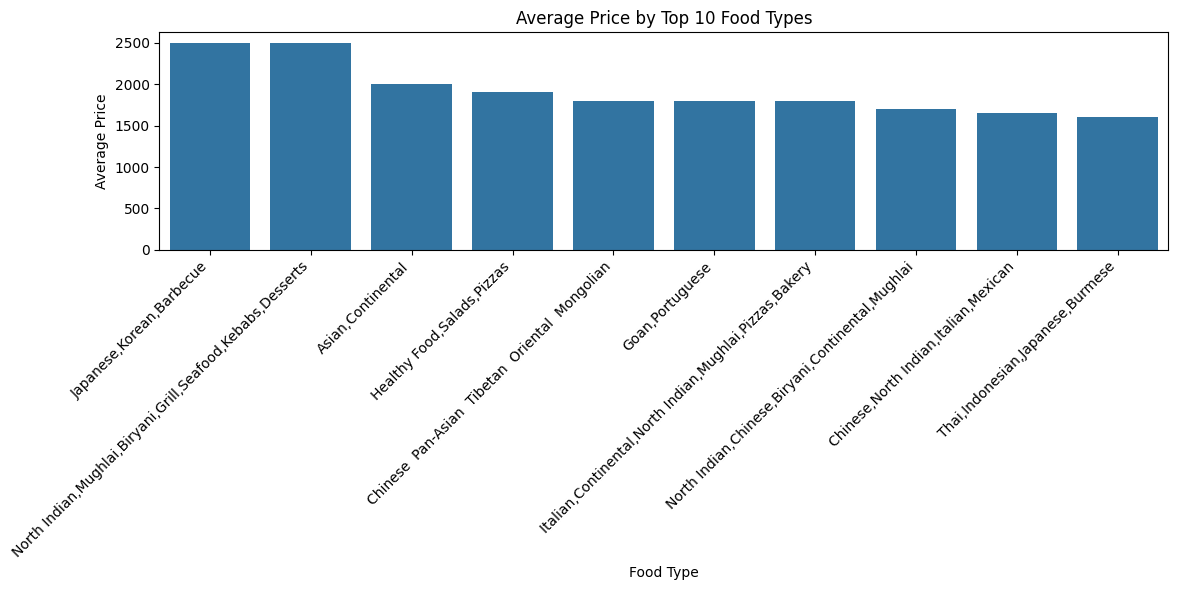

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_food_type.head(10).index, y=average_price_by_food_type.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Top 10 Food Types')
plt.xlabel('Food Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a histogram of average ratings to show the distribution of restaurant ratings.

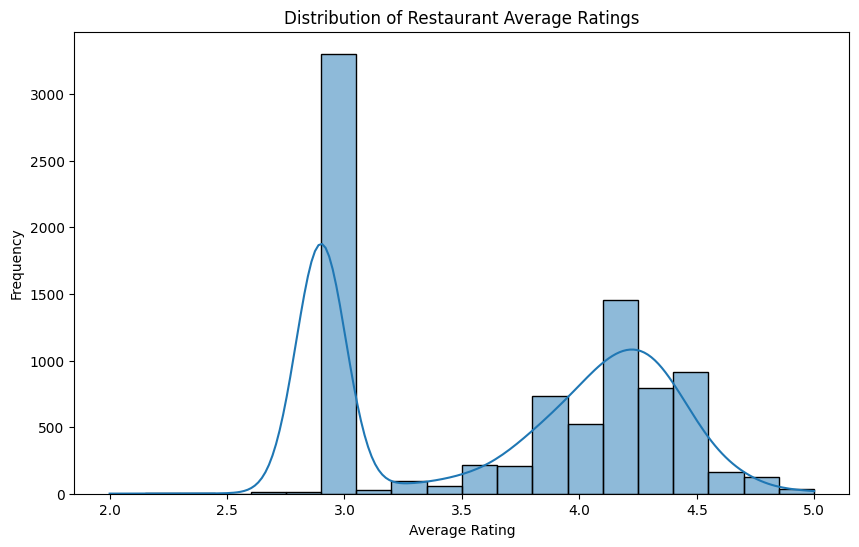

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg ratings'], bins=20, kde=True)
plt.title('Distribution of Restaurant Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

## Hard Questions Analysis

### Subtask:
Calculate the correlation between restaurant prices and average ratings.

**Reasoning**:
Calculate the correlation coefficient between the 'Price' and 'Avg ratings' columns to determine if there is a linear relationship between restaurant prices and their average ratings.

In [22]:
correlation = df['Price'].corr(df['Avg ratings'])
print(f"Correlation coefficient between Price and Average Ratings: {correlation:.2f}")

Correlation coefficient between Price and Average Ratings: 0.11


## Hard Questions Visualization

### Subtask:
Create a scatter plot for price vs. average rating, a box plot for delivery time outliers, a box plot for price distribution by rating categories, and a grouped bar chart for average price and rating by city.

**Reasoning**:
Create a scatter plot to visualize the relationship between 'Price' and 'Avg ratings'. This will help in understanding the correlation calculated in the previous step.

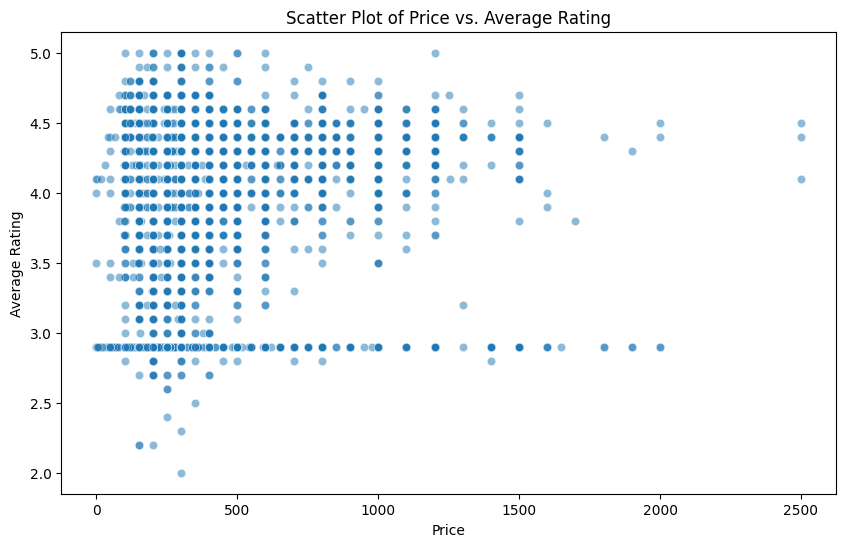

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Avg ratings', data=df, alpha=0.5)
plt.title('Scatter Plot of Price vs. Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

**Reasoning**:
Create a box plot for the 'Delivery time' column to visualize the distribution and identify potential outliers. Outliers might indicate restaurants with unusually long or short delivery times compared to the majority.

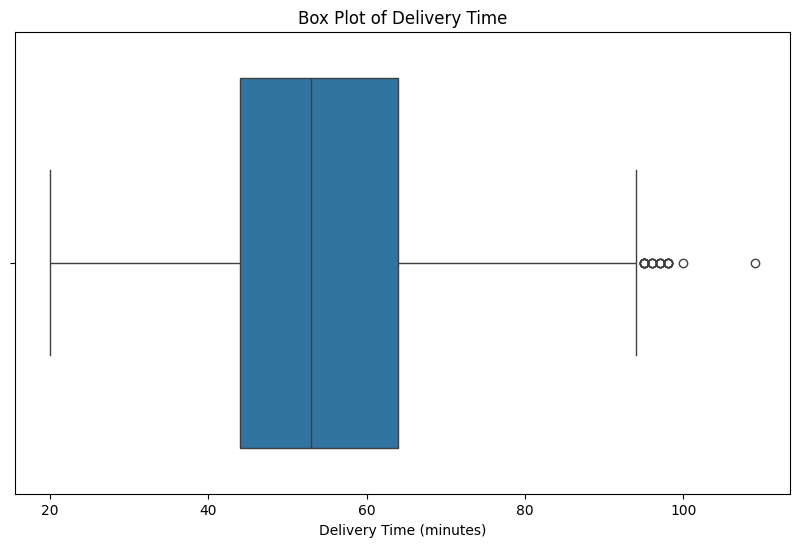

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Delivery time'])
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

**Reasoning**:
Create a box plot to compare the distribution of prices for restaurants with different average rating categories. Define rating categories and create a new column for them to use in the box plot.

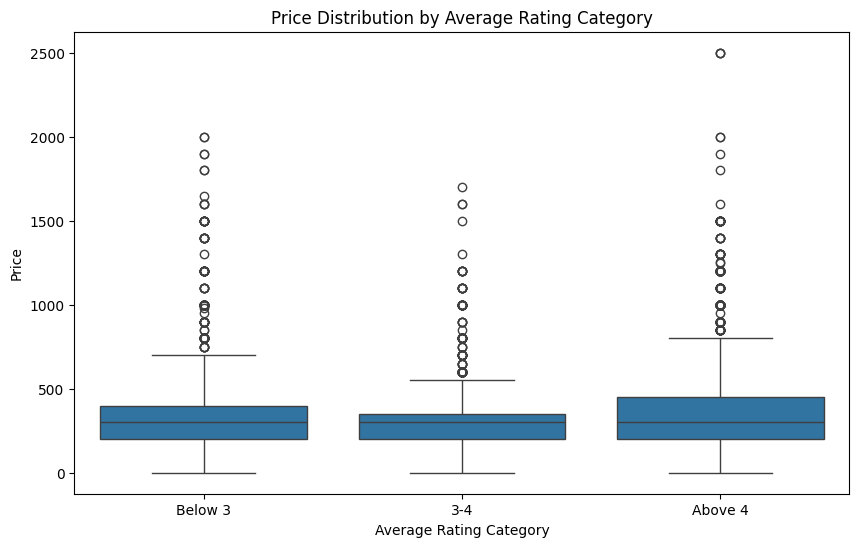

In [25]:
def rating_category(rating):
    if rating < 3:
        return 'Below 3'
    elif 3 <= rating <= 4:
        return '3-4'
    else:
        return 'Above 4'

df['Rating Category'] = df['Avg ratings'].apply(rating_category)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating Category', y='Price', data=df, order=['Below 3', '3-4', 'Above 4'])
plt.title('Price Distribution by Average Rating Category')
plt.xlabel('Average Rating Category')
plt.ylabel('Price')
plt.show()

**Reasoning**:
Perform a grouped analysis to determine the average price and average rating for each city. Visualize the results with a grouped bar chart.

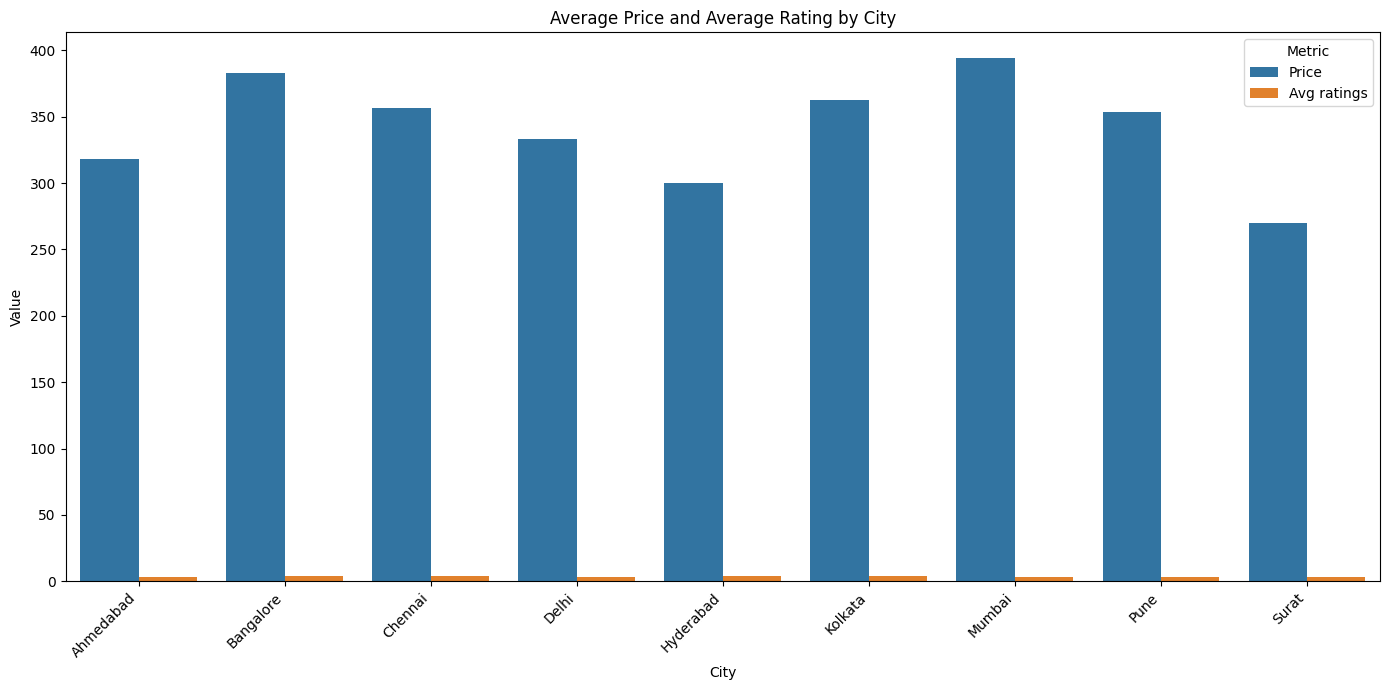

In [26]:
city_analysis = df.groupby('City')[['Price', 'Avg ratings']].mean().reset_index()

# Melt the DataFrame to long format for grouped bar chart
city_analysis_melted = city_analysis.melt(id_vars='City', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='Value', hue='Metric', data=city_analysis_melted)
plt.title('Average Price and Average Rating by City')
plt.xlabel('City')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()